In [207]:
import random
from IPython.display import Image

# Simple malleable scheduler 

Objective: Min makespan


Variables: 

Constraints:
- two jobs cannot be scheduled on the processor at the same time
- A jobs can be reconfigured
- quantum of time / time slot
- number of processors at each time slot is fixed


Assumptions:
- No reconfiguration time
- amount of resources required = number of processors x time
- max amount of time required to 


Algorithm: Greedy largest task first
- order the jobs from the largest to smallest in terms of resources
- for all task t in tasks (starting with largest)
- if t is smaller than first available timeslot:
    add time slot number : t to task dict, subtract t to res of first time slot <br>
  else if t is equal to the first available timeslot: add time slot number : t to task dict, remove time slot from list of available resources <br>
  else if t is larger than he first available timeslot:<br>
  add time slot number : res available at first time slot<br>
  remove timeslot<br>
  t_ = t - res available at first time slot <br>
  while (t_>0):<br>
  if t_ is smaller than first available timeslot:
    add time slot number : t_ to task dict, subtract t_ to res of time slot, t_ = 0 <br>
  else if t is equal to the first available timeslot: add time slot number : t_ to task dict, t_ = 0 , remove time slot from list of available resources <br>
  else if t is largest to the first available timeslot: add time slot number : t_ to task dict, subtract  res of time slot to t_, t_ = 0 , remove time slot from list of available resources <br>


In python:
Input: 
- Task: $q$ total amount of resources required = number of processors x time, Dictionary : 
- available processors at each time slots: array 

Output:
 [amount of resources, start time , end time, for each t the number of resources]




Initializing the resources available for computation

In [208]:
# max number of processors available at each time slot
max_num_proc = 5

# res_av resources available at each timeslot
#dictionary key:time slot and value:amount of resources available on that time slot
res_av = [{'timeslot':i,'res' : max_num_proc} for i in range(1,10)]

# res_used resources used at each timeslot
#dictionary key:time slot and value:amount of resources available on that time slot
#res_used = [{i : 0} for i in range(1,10)]

Preparing the input

In [209]:
# Defining 2 jobs, one requiring 7 resource blocks and another requiring 2 blocks
job1 = {'name': 'task1', 'res_req':12}
job2 = {'name': 'task2','res_req':2}
job3 = {'name': 'task3', 'res_req':7}

In [210]:
# putting all the jobs into one array
jobs = [job2, job1, job3]

# Sorting jobs from lowest res_req value to largest 
jobs = sorted(jobs, key=lambda k: k['res_req']) 

# reverse list order so that the jobs are ordered in decreasing res_req order
jobs.reverse()

In [211]:
jobs

[{'name': 'task1', 'res_req': 12},
 {'name': 'task3', 'res_req': 7},
 {'name': 'task2', 'res_req': 2}]

In [212]:
res_av

[{'timeslot': 1, 'res': 5},
 {'timeslot': 2, 'res': 5},
 {'timeslot': 3, 'res': 5},
 {'timeslot': 4, 'res': 5},
 {'timeslot': 5, 'res': 5},
 {'timeslot': 6, 'res': 5},
 {'timeslot': 7, 'res': 5},
 {'timeslot': 8, 'res': 5},
 {'timeslot': 9, 'res': 5}]

In [213]:
for job in jobs:
    t = job['res_req']
    
    if t < res_av[0]['res']:
        job[res_av[0]['timeslot']] = t
        res_av[0]['res'] = res_av[0]['res'] - t
    
    elif t == res_av[0]['res']:
        job[res_av[0]['timeslot']] = t
        del res_av[0]
    
    else:
        job[res_av[0]['timeslot']] = res_av[0]['res']
        del res_av[0]
        t_ = t - res_av[0]['res']
        while (t_>0):
            job[res_av[0]['timeslot']] = t_
            if t_ < res_av[0]['res']:
                res_av[0]['res'] = res_av[0]['res'] - t_
                t_ = 0
            elif t == res_av[0]['res']:    
                del res_av[0]
                t_ = 0
            else:
                t_ = t_ - res_av[0]['res']
                del res_av[0]
        
if res_av[0]['res'] != max_num_proc:
    make_span = res_av[0]['timeslot'] 
else:
    make_span = res_av[0]['timeslot'] - 1

In [214]:
jobs

[{'name': 'task1', 'res_req': 12, 1: 5, 2: 7, 3: 2},
 {'name': 'task3', 'res_req': 7, 3: 3, 4: 2},
 {'name': 'task2', 'res_req': 2, 4: 2}]

In [215]:
res_av

[{'timeslot': 4, 'res': 1},
 {'timeslot': 5, 'res': 5},
 {'timeslot': 6, 'res': 5},
 {'timeslot': 7, 'res': 5},
 {'timeslot': 8, 'res': 5},
 {'timeslot': 9, 'res': 5}]

In [216]:
make_span

4

In [217]:
import cairocffi as cairo

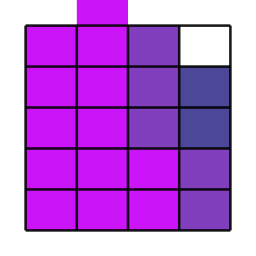

In [218]:
WIDTH, HEIGHT = 256, 256

surface = cairo.ImageSurface(cairo.FORMAT_ARGB32, WIDTH, HEIGHT)
ctx = cairo.Context(surface)

ctx.scale(WIDTH, HEIGHT)  # Normalizing the canvas

ctx.rectangle(0, 0, 1, 1)  # Rectangle(x0, y0, width, height)
ctx.set_source_rgb(1, 1, 1)
ctx.fill()



jobs_colors = [[ random.random() for j in range(3)] for i in range (len(jobs))]

res_used = [0 for i in range(0 , make_span)]
x_offset = 0.1
y_offset = 0.1
rect_width = (1 - x_offset * 2) / make_span
rect_height = (1 - y_offset * 2) / max_num_proc

for i in range(make_span):
    for j in range(len(jobs)):
        if i + 1 in jobs[j]:

            ctx.rectangle(x_offset + i * rect_width, 1 - (y_offset + (res_used[i] + jobs[j][i+1] ) * rect_height),
                           rect_width,  jobs[j][i+1] * rect_height)
            res_used[i] = res_used[i] + jobs[j][i+1]
            ctx.set_source_rgb(jobs_colors[j][0], jobs_colors[j][1], jobs_colors[j][2])
            ctx.fill()


for i in range(make_span + 1):
    
        ctx.move_to(x_offset + i * rect_width, y_offset)
        ctx.line_to(x_offset + i * rect_width, 1 - y_offset)
        ctx.set_source_rgba(0, 0, 0, 0.9)  
        ctx.set_line_width(0.01)
        ctx.stroke()

for j in range(max_num_proc + 1):
    ctx.move_to(x_offset , y_offset + j * rect_height)
    ctx.line_to(1 - x_offset, y_offset + j * rect_height)
    ctx.set_source_rgba(0, 0, 0, 0.9)  
    ctx.set_line_width(0.01)
    ctx.stroke()
        
surface.write_to_png("example.png")  # Output to PNG
Image(filename = "example.png", width=200, height=200)